## INSURANCE FRAUD DETECTION :
    
#### As we all know about insurance that it will cover us financially from uncertain hospitalisation and occurance. We take insurance for many things like self, car, property, gold,business unit etc But sometimes, people take it's wrong advantage and generate fraud bill and try for claim. Here, we have some past data where insurance agency have found some fraud in claim request. so based on this data we will learn and proceed.

## GOAL : 
    
#### By learning available data, we will make model which can detect fraud for input data


### IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
!pip install plotly_express
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
!pip install bubbly
from bubbly.bubbly import bubbleplot
import plotly_express as px
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

### LOAD DATASET

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
#Total 1000 rows and 40 columns in dataset
df.shape

(1000, 40)

In [6]:
#Apart from 1 column, there is no null value in dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#check co-relation
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [8]:
#Drop _C39 as it's all values = null
df.drop(("_c39"),inplace = True, axis = 1)

In [9]:
categorical_df=[j for j in df if df[j].dtype == 'object']

In [10]:
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)
    
#catagorical columns in dataset

policy_bind_date ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

In [11]:
#Ratio of fraud reported in total claim
fraud = df['fraud_reported'].value_counts()
label_fraud = fraud.index
size_fraud = fraud.values

colors = ['red', 'green']
graph = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.6)

df1 = [graph]

mygraph = go.Layout(
           title = 'Distribution_of_Frauds')

fig = go.Figure(data = df1, layout = mygraph)

py.iplot(fig)

As we can visulise that 75% data are ok but 25% claims found fraud

In [12]:
df['policy_csl']= df['policy_csl'].replace(['250/500','100/300','500/1000'],['0.5','0.33','0.5'],inplace = False)
df['policy_csl'].unique()

#Replace objective value to float

array(['0.5', '0.33'], dtype=object)

In [13]:
df['insured_education_level']= df['insured_education_level'].replace(['JD','High School','College','Associate','MD','PhD'],['basic','basic','college','college','master_and_above','master_and_above'],inplace = False)
df['insured_education_level'].unique()

#Data sorting....

array(['master_and_above', 'college', 'Masters', 'basic'], dtype=object)

In [14]:
df['insured_relationship']= df['insured_relationship'].replace(['husband','wife','unmarried','other-relative','not-in-family','own-child'],['spouse','spouse','unmarried','other','other','other'],inplace = False)
df['insured_relationship'].unique()


array(['spouse', 'other', 'unmarried'], dtype=object)

In [15]:
df = df.replace('?', np.nan)

#replace ? with nan 

In [16]:
print(df['collision_type'].value_counts(normalize=True)*100)


Rear Collision     35.523114
Side Collision     33.576642
Front Collision    30.900243
Name: collision_type, dtype: float64


In [17]:
nan = df['collision_type'].isna()
length = sum(nan)
replacement = random.choices(['Rear Collision','Side Collision','Front Collision'], weights=[0.35,0.34,31], k=length)
df.loc[nan,'collision_type'] = replacement

print(df['collision_type'].describe())

#replace nan with diffrent weigtage

count                1000
unique                  3
top       Front Collision
freq                  424
Name: collision_type, dtype: object


In [18]:
print(df['property_damage'].value_counts(normalize=True)*100)

NO     52.8125
YES    47.1875
Name: property_damage, dtype: float64


In [19]:
nan = df['property_damage'].isna()
length = sum(nan)
replacement = random.choices(['NO','YES'], weights=[0.53,0.47], k=length)
df.loc[nan,'property_damage'] = replacement

print(df['property_damage'].describe())
#replace nan with diffrent weigtage

count     1000
unique       2
top         NO
freq       515
Name: property_damage, dtype: object


In [20]:
print(df['police_report_available'].value_counts(normalize=True)*100)

NO     52.207002
YES    47.792998
Name: police_report_available, dtype: float64


In [21]:
nan = df['police_report_available'].isna()
length = sum(nan)
replacement = random.choices(['NO','YES'], weights=[0.52,0.48], k=length)
df.loc[nan,'police_report_available'] = replacement

print(df['police_report_available'].describe())
#replace nan with diffrent weigtage

count     1000
unique       2
top         NO
freq       520
Name: police_report_available, dtype: object


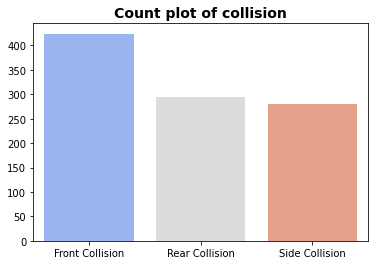

In [22]:
fig = sns.barplot(df['collision_type'].value_counts().index,df['collision_type'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of collision', fontsize=14, fontweight='bold')
plt.show()

As we can visulise that there are high number of objects are of Front collision nearly to 420 then rear collision nearly to 300 and side collision near to 280

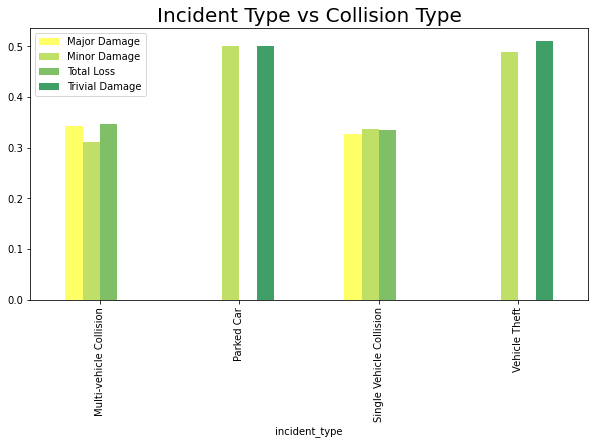

In [23]:

incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer_r(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (10,5),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

1)When Multi-vehicle collision occurs, there are higher chances of Total loss

2) When parked car collision occurs, there is equal chances for total loss or trivial damage

3)single vehicle collision leads to equal chances of major or minor or total damage

4_In case of vehicle damage, higher chances of total loss or trivial damage

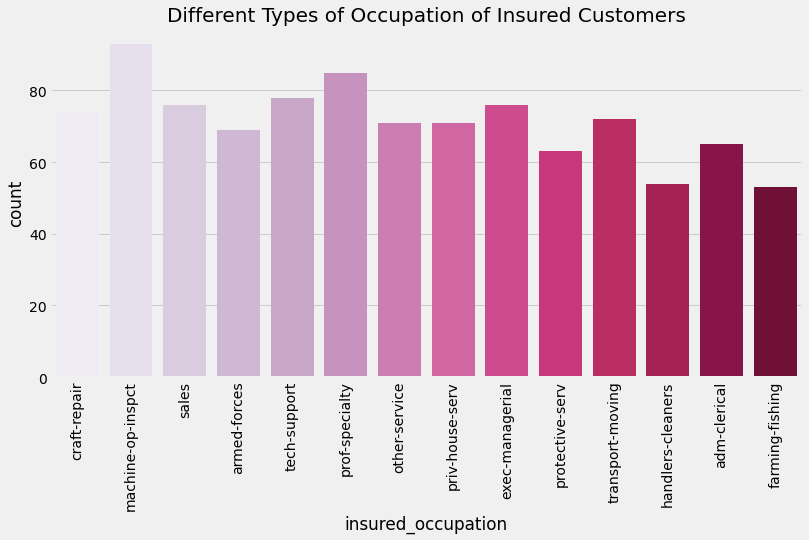

In [24]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

As we can visulise that:
    
    There are higher parts of insured person are from machine-op-inspect and proof speciality
    
    lower number of insured are of farming and fishing and from handles and cleaners also
    

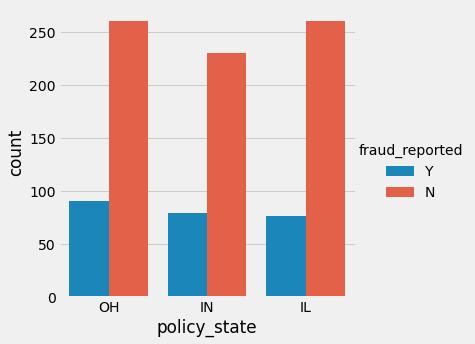

In [25]:
sns.catplot(x ='policy_state', hue ='fraud_reported',
kind ='count', data = df)

IN policy state insured are under higher fraud report


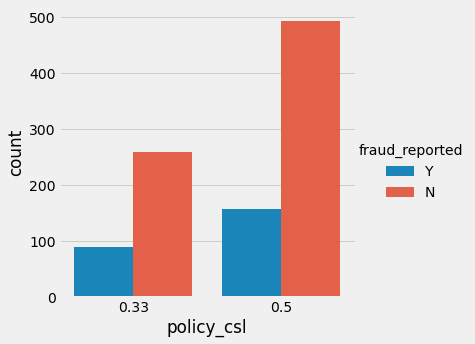

In [26]:
sns.catplot(x ='policy_csl', hue ='fraud_reported',
kind ='count', data = df)

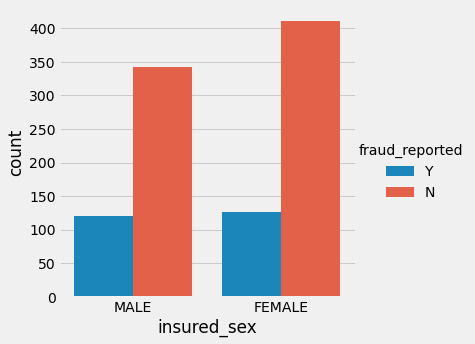

In [27]:
sns.catplot(x ='insured_sex', hue ='fraud_reported',
kind ='count', data = df)

Fraud report ratio is higher in Male insured

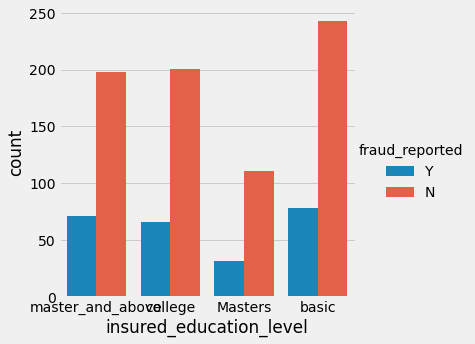

In [28]:
sns.catplot(x ='insured_education_level', hue ='fraud_reported',
kind ='count', data = df)

Higher education leads to higher fraud report

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

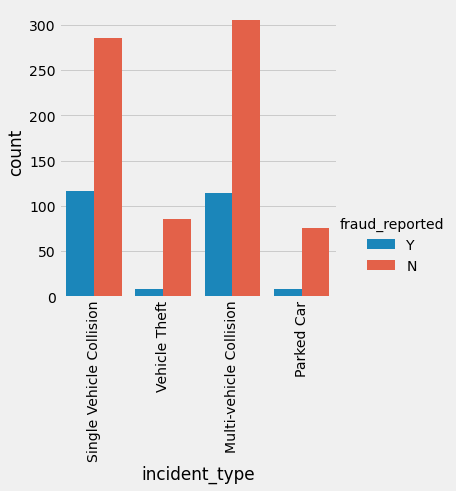

In [29]:
sns.catplot(x ='incident_type', hue ='fraud_reported',
kind ='count', data = df)
plt.xticks(rotation = 90)

Fraud report ratio is higher in single vehicle collision and multi vehicle collision

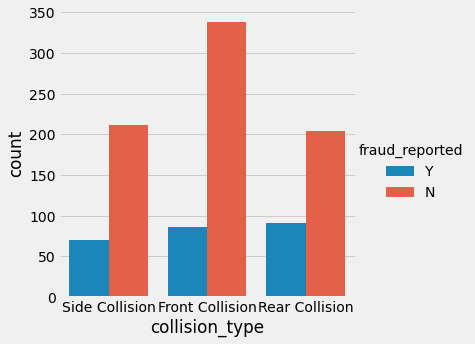

In [30]:
sns.catplot(x ='collision_type', hue ='fraud_reported',
kind ='count', data = df)

Ratio of fraud report detection is nearly 40 to 45% in Rear collision

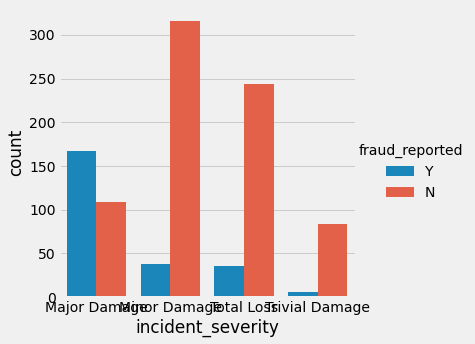

In [31]:
sns.catplot(x ='incident_severity', hue ='fraud_reported',
kind ='count', data = df)

Clearly visible that major damage leads to fraud report in maximum cases

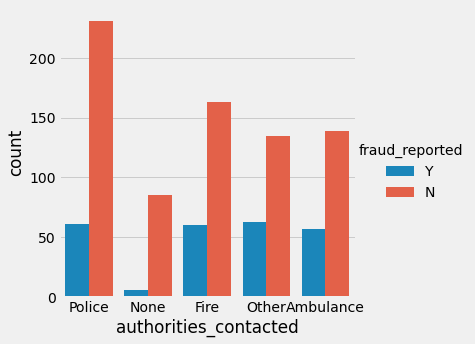

In [32]:
sns.catplot(x ='authorities_contacted', hue ='fraud_reported',
kind ='count', data = df)

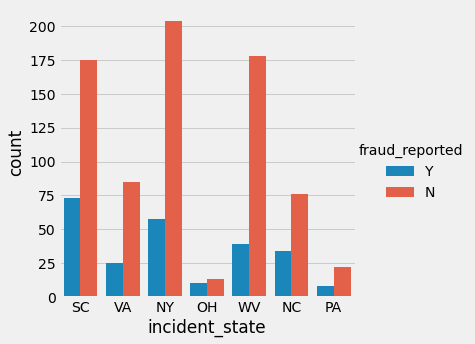

In [33]:
sns.catplot(x ='incident_state', hue ='fraud_reported',
kind ='count', data = df)

IN OH state, higher ratio of fraud detection

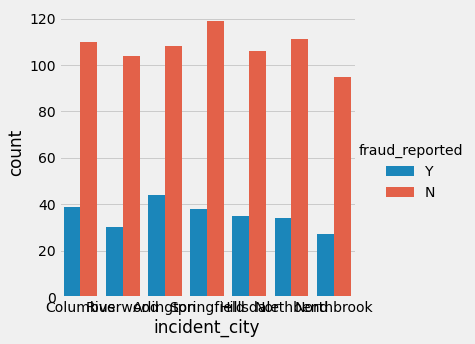

In [34]:
sns.catplot(x ='incident_city', hue ='fraud_reported',
kind ='count', data = df)

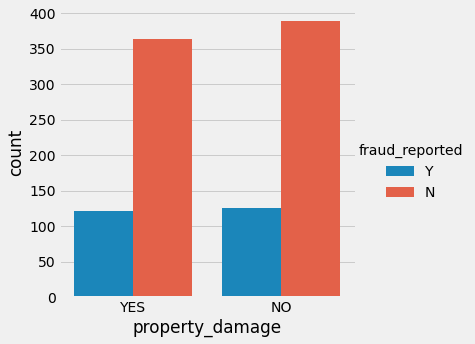

In [35]:
sns.catplot(x ='property_damage', hue ='fraud_reported',
kind ='count', data = df)

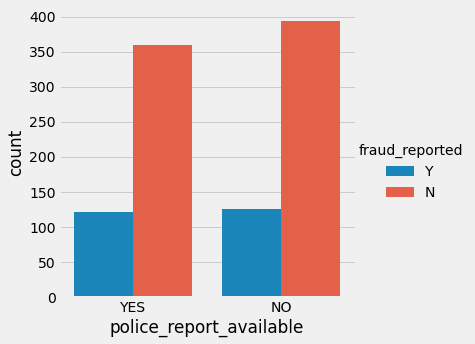

In [36]:
sns.catplot(x ='police_report_available', hue ='fraud_reported',
kind ='count', data = df)

Not much relation visulise between police report and fraud report

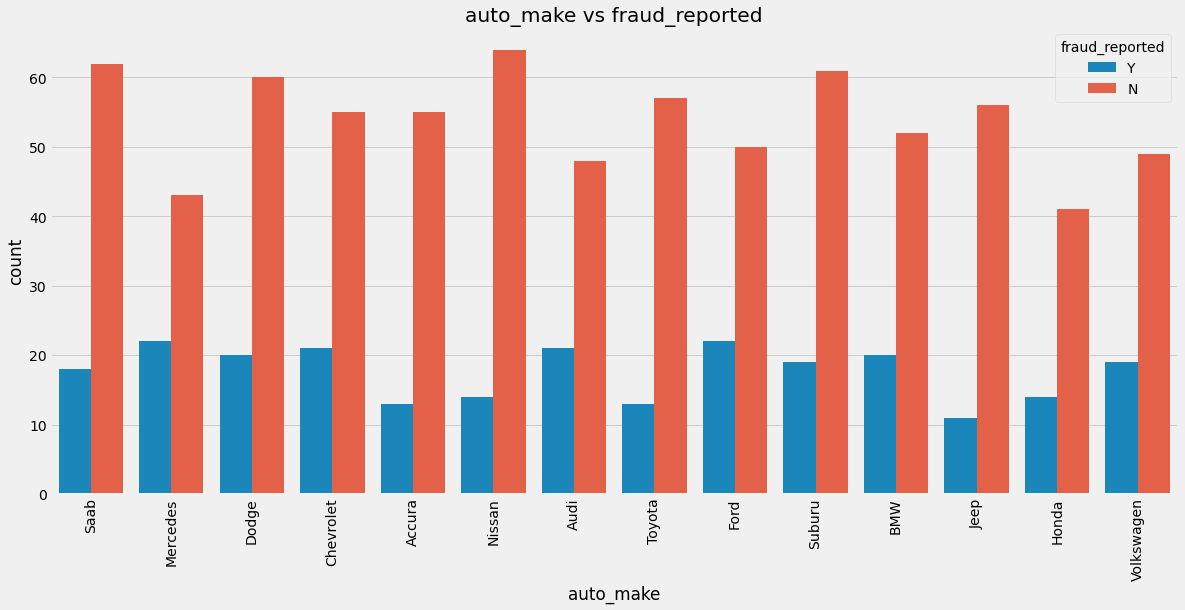

In [37]:

plt.figure(figsize=(18,8))
sns.countplot(x = 'auto_make',hue='fraud_reported',data=df)
plt.title("auto_make vs fraud_reported")
plt.xticks(rotation=90)
plt.show()

Fraud report found in higher ratio for mercedes benz cars,audi,ford

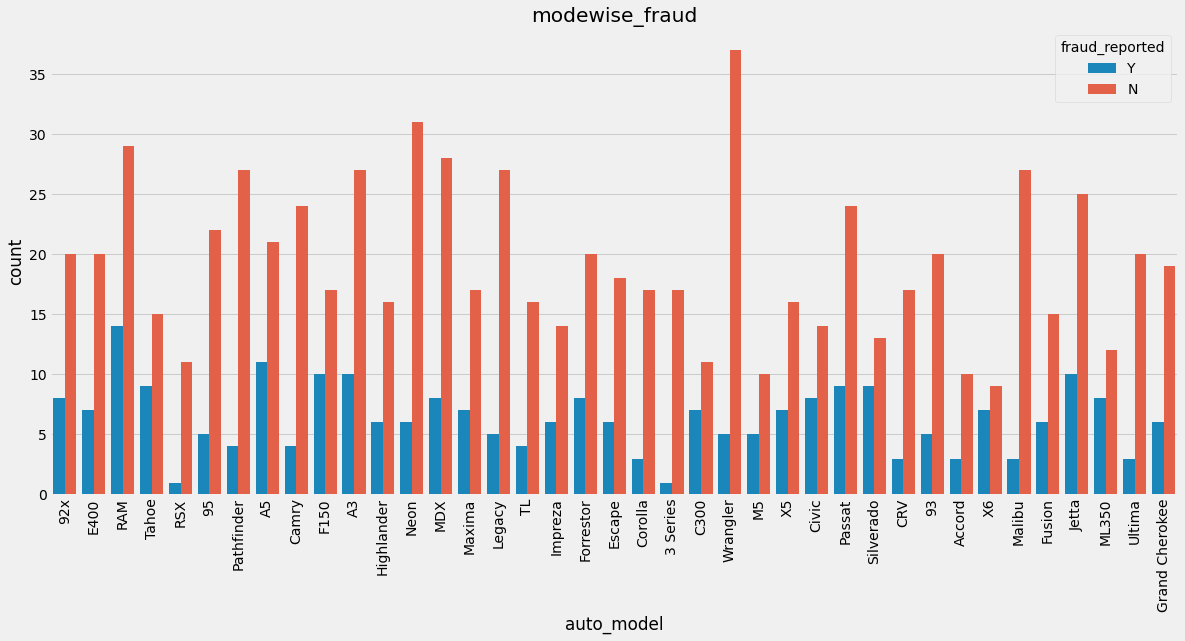

In [38]:

plt.figure(figsize=(18,8))
sns.countplot(x = 'auto_model',hue='fraud_reported',data=df)
plt.title("modewise_fraud")
plt.xticks(rotation=90)
plt.show()

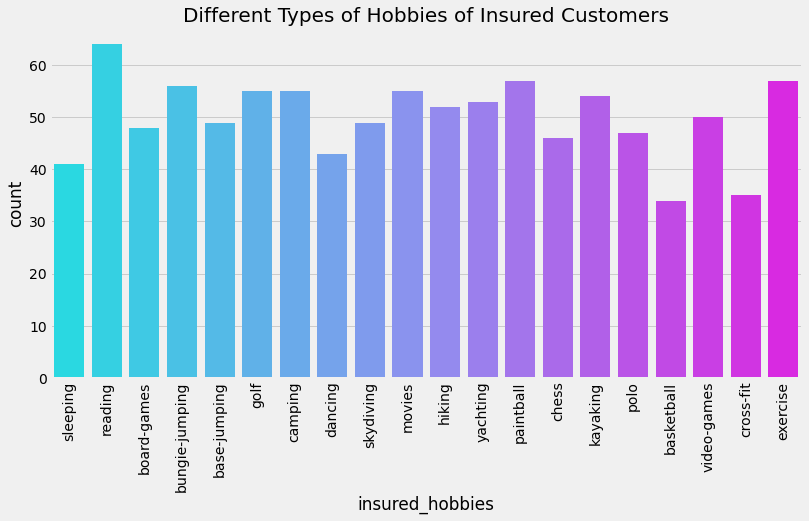

In [39]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

From insured person, most of have hobbies of reading, exercise, paintball,movies and some people have hobbies of cross-fit and basketball

In [40]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [41]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [42]:
policy_statewise_fraud = df.groupby(['fraud_reported','policy_state']).apply(lambda df: round(df['policy_state'].count(), 0))
print(policy_statewise_fraud)

print('in IL, the fraud ratio is' ,(100*77)/(261+77))
print('in IN, the fraud ratio is' ,(100*79)/(231+79))
print('in OH, the fraud ratio is' ,(100*91)/(261+91))

fraud_reported  policy_state
N               IL              261
                IN              231
                OH              261
Y               IL               77
                IN               79
                OH               91
dtype: int64
in IL, the fraud ratio is 22.781065088757398
in IN, the fraud ratio is 25.483870967741936
in OH, the fraud ratio is 25.852272727272727


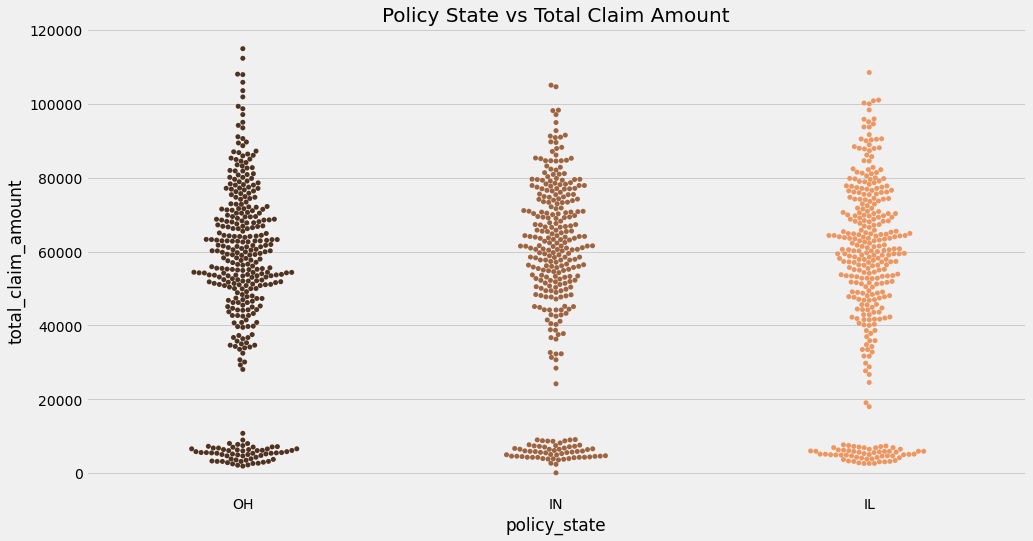

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [44]:
fraud_report_insured_education_level = df.groupby(['fraud_reported','insured_education_level']).apply(lambda df: round(df['policy_state'].count(), 0))
print(fraud_report_insured_education_level)

print('in masters, the fraud ratio is' ,(100*32)/(111+32))
print('in basic, the fraud ratio is' ,(100*78)/(243+78))
print('in college, the fraud ratio is' ,(100*66)/(201+66))
print('in master and above, the fraud ratio is' ,(100*71)/(198+71))

fraud_reported  insured_education_level
N               Masters                    111
                basic                      243
                college                    201
                master_and_above           198
Y               Masters                     32
                basic                       78
                college                     66
                master_and_above            71
dtype: int64
in masters, the fraud ratio is 22.377622377622377
in basic, the fraud ratio is 24.299065420560748
in college, the fraud ratio is 24.719101123595507
in master and above, the fraud ratio is 26.394052044609666


In [45]:
policy_insured_occupation_fraud = df.groupby(['fraud_reported','insured_occupation']).apply(lambda df: round(df['insured_occupation'].count(), 0))
print(policy_insured_occupation_fraud)

print('in adm-clerical, the fraud ratio is' ,(100*11)/(54+11))
print('in armed-forces, the fraud ratio is' ,(100*17)/(52+17))
print('in craft-repair, the fraud ratio is' ,(100*22)/(52+22))
print('in exec-managerial, the fraud ratio is' ,(100*28)/(48+28))
print('in farming-fishing, the fraud ratio is' ,(100*16)/(37+16))
print('in machine-op-inspct, the fraud ratio is' ,(100*22)/(71+22))
print('in other-service, the fraud ratio is' ,(100*12)/(59+12))
print('in priv-house-serv , the fraud ratio is' ,(100*12)/(59+12))
print('in prof-specialty, the fraud ratio is' ,(100*18)/(67+18))
print('in protective-serv, the fraud ratio is' ,(100*14)/(49+14))
print('in sales, the fraud ratio is' ,(100*21)/(55+21))
print('in tech-support, the fraud ratio is' ,(100*22)/(56+22))
print('in transport-moving, the fraud ratio is' ,(100*21)/(51+21))

fraud_reported  insured_occupation
N               adm-clerical          54
                armed-forces          52
                craft-repair          52
                exec-managerial       48
                farming-fishing       37
                handlers-cleaners     43
                machine-op-inspct     71
                other-service         59
                priv-house-serv       59
                prof-specialty        67
                protective-serv       49
                sales                 55
                tech-support          56
                transport-moving      51
Y               adm-clerical          11
                armed-forces          17
                craft-repair          22
                exec-managerial       28
                farming-fishing       16
                handlers-cleaners     11
                machine-op-inspct     22
                other-service         12
                priv-house-serv       12
                prof-s

In [46]:
policy_statewise_fraud = df.groupby(['fraud_reported','policy_state']).apply(lambda df: round(df['policy_state'].count(), 0))
print(policy_statewise_fraud)

print('in IL, the fraud ratio is' ,(100*77)/(261+77))
print('in IN, the fraud ratio is' ,(100*79)/(231+79))
print('in OH, the fraud ratio is' ,(100*91)/(261+91))

fraud_reported  policy_state
N               IL              261
                IN              231
                OH              261
Y               IL               77
                IN               79
                OH               91
dtype: int64
in IL, the fraud ratio is 22.781065088757398
in IN, the fraud ratio is 25.483870967741936
in OH, the fraud ratio is 25.852272727272727


In [47]:
bodily_injuries_fraud = df.groupby(['fraud_reported','bodily_injuries']).apply(lambda df: round(df['bodily_injuries'].count(), 0))
print(bodily_injuries_fraud)


fraud_reported  bodily_injuries
N               0                  260
                1                  251
                2                  242
Y               0                   80
                1                   77
                2                   90
dtype: int64


In [48]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                          object
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [49]:
df.drop(['auto_make','auto_year','incident_hour_of_the_day','incident_city','incident_state','insured_zip'], inplace = True, axis = 1)

In [50]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_model,fraud_reported
0,328,48,521585,2014-10-17,OH,0.5,1000,1406.91,0,MALE,...,YES,1,2,YES,71610,6510,13020,52080,92x,Y
1,228,42,342868,2006-06-27,IN,0.5,2000,1197.22,5000000,MALE,...,NO,0,0,YES,5070,780,780,3510,E400,Y
2,134,29,687698,2000-06-09,OH,0.33,2000,1413.14,5000000,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,RAM,N
3,256,41,227811,1990-05-25,IL,0.5,2000,1415.74,6000000,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,Tahoe,Y
4,228,44,367455,2014-06-06,IL,0.5,1000,1583.91,6000000,MALE,...,NO,0,1,NO,6500,1300,650,4550,RSX,N


EDA CONCLUSION :
    
    After working on statatics parts and some visulisation, here, we get idea that which factor affets fraud claim more and which data is not related to fraud detection,
    we drop some columns and convert objective data to int or flaot by using encoding technique.
    
    Now we will scale all data on same platform and also see about outliers

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["policy_state"]= le.fit_transform(df["policy_state"])
df["insured_sex"]= le.fit_transform(df["insured_sex"])
df["insured_education_level"]= le.fit_transform(df["insured_education_level"])
df["insured_occupation"]= le.fit_transform(df["insured_occupation"])
df["property_damage"]= le.fit_transform(df["property_damage"])
df["police_report_available"]= le.fit_transform(df["police_report_available"])
df["auto_model"]= le.fit_transform(df["auto_model"])
df["policy_csl"]= le.fit_transform(df["policy_csl"])
df["insured_hobbies"]= le.fit_transform(df["insured_hobbies"])
df["insured_relationship"]= le.fit_transform(df["insured_relationship"])
df["incident_type"]= le.fit_transform(df["incident_type"])
df["collision_type"]= le.fit_transform(df["collision_type"])
df["incident_severity"]= le.fit_transform(df["incident_severity"])
df["authorities_contacted"]= le.fit_transform(df["authorities_contacted"])

In [52]:
df["fraud_reported"]= le.fit_transform(df["fraud_reported"])

In [53]:
df.drop(['policy_bind_date','incident_date','incident_location'], inplace = True, axis = 1)

In [54]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim             

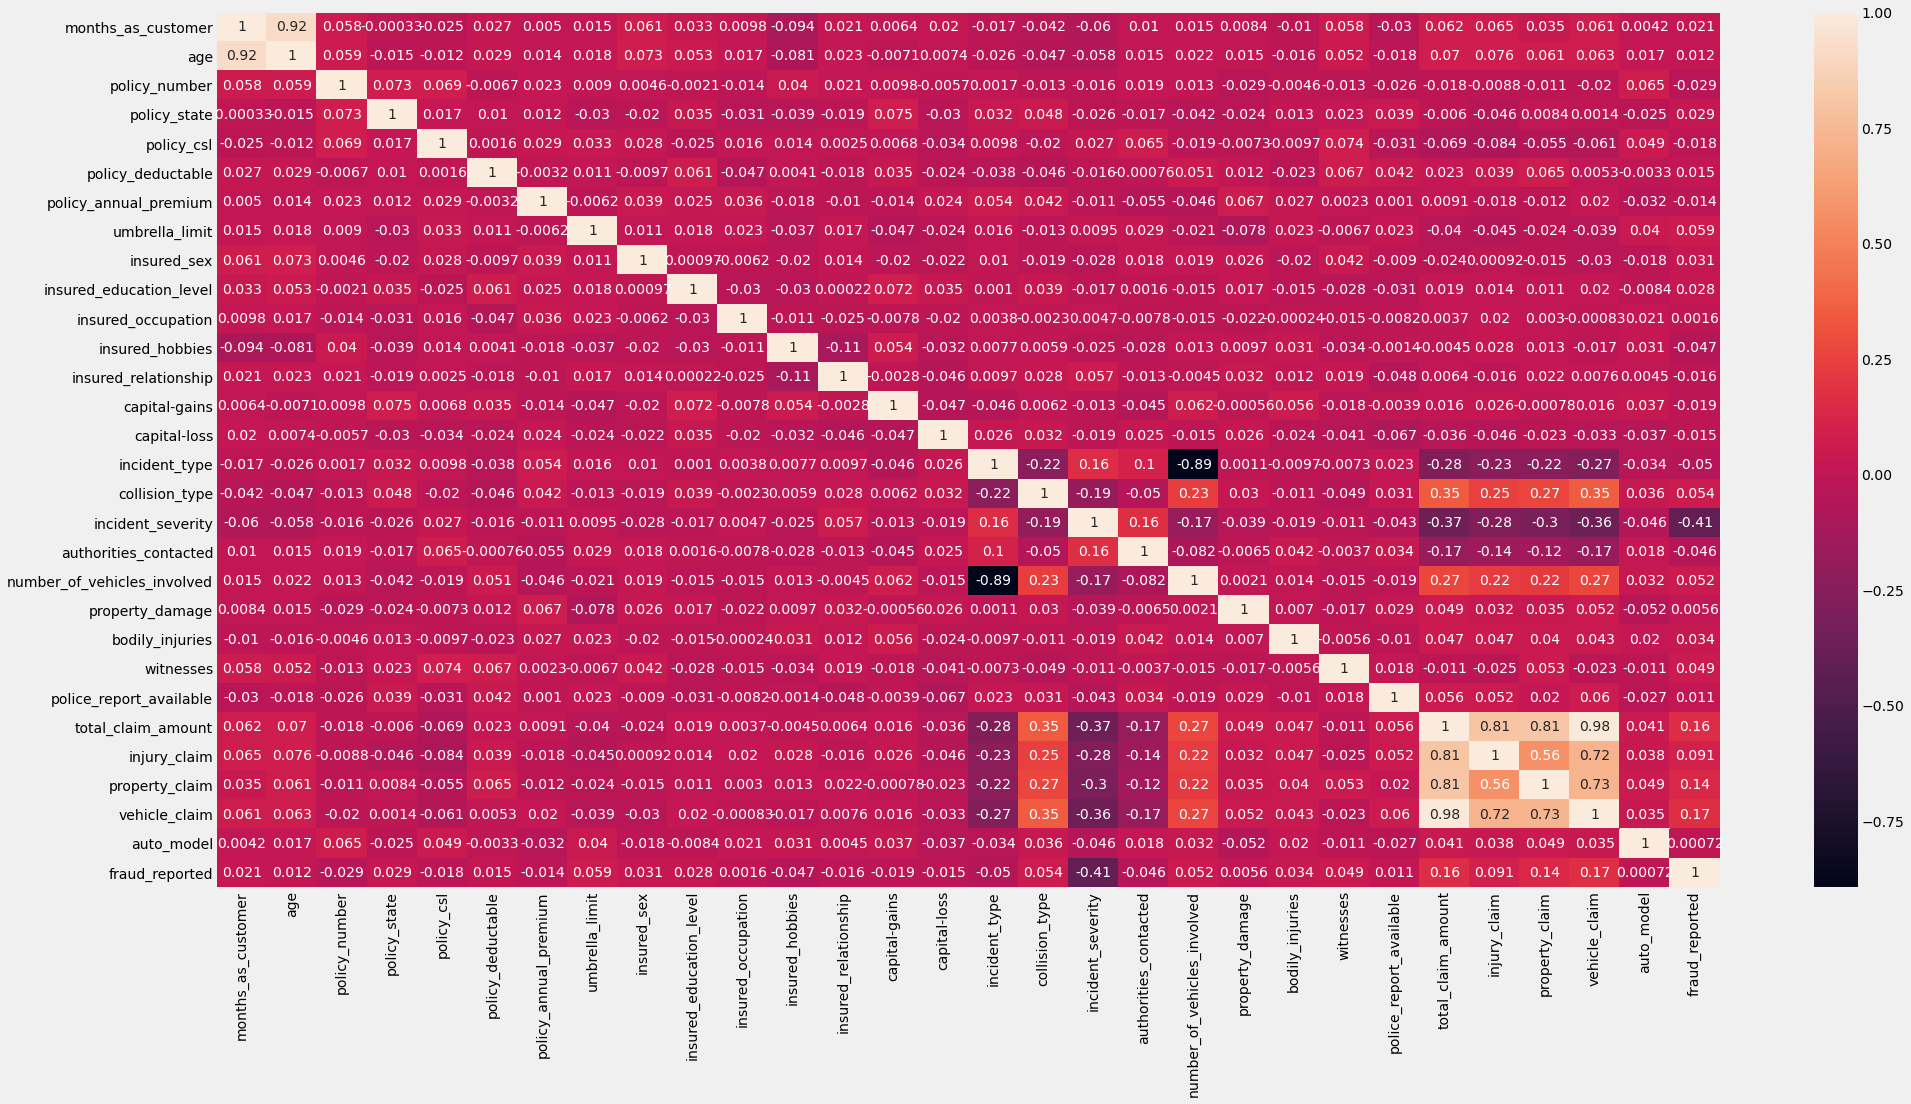

In [55]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),vmax=1,annot = True,linecolor = 'black')
plt.xticks(rotation=90)
plt.show()

In [56]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.025164,0.026807,0.005018,0.015498,0.060925,0.033374,...,0.008353,-0.010162,0.058383,-0.030060,0.062108,0.065329,0.034940,0.061013,0.004202,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.011516,0.029188,0.014404,0.018126,0.073337,0.052658,...,0.015161,-0.015679,0.052359,-0.018413,0.069863,0.075522,0.060898,0.062588,0.017343,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.069440,-0.006738,0.022566,0.008968,0.004564,-0.002142,...,-0.029037,-0.004558,-0.012661,-0.025979,-0.018009,-0.008762,-0.010678,-0.020184,0.065240,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.017394,0.010033,0.012455,-0.029580,-0.020481,0.034973,...,-0.023586,0.013384,0.022960,0.039235,-0.006002,-0.046290,0.008406,0.001425,-0.025253,0.029432
policy_csl,-0.025164,-0.011516,0.069440,0.017394,1.000000,0.001592,0.029115,0.033119,0.027714,-0.024517,...,-0.007283,-0.009705,0.073590,-0.031411,-0.069471,-0.084282,-0.055300,-0.061206,0.049380,-0.018471
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.001592,1.000000,-0.003245,0.010870,-0.009733,0.061451,...,0.011582,-0.022765,0.066639,0.041632,0.022839,0.039107,0.064792,0.005269,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.029115,-0.003245,1.000000,-0.006247,0.038853,0.024818,...,0.066874,0.026780,0.002332,0.001014,0.009094,-0.017633,-0.011654,0.020246,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.033119,0.010870,-0.006247,1.000000,0.010688,0.017502,...,-0.078411,0.022743,-0.006738,0.023117,-0.040344,-0.045412,-0.023790,-0.038584,0.040256,0.058622
insured_sex,0.060925,0.073337,0.004564,-0.020481,0.027714,-0.009733,0.038853,0.010688,1.000000,0.000968,...,0.025863,-0.020297,0.042463,-0.008992,-0.023727,0.000924,-0.014868,-0.029609,-0.018421,0.030873
insured_education_level,0.033374,0.052658,-0.002142,0.034973,-0.024517,0.061451,0.024818,0.017502,0.000968,1.000000,...,0.017456,-0.015141,-0.028491,-0.030818,0.018697,0.013939,0.011486,0.019601,-0.008384,0.028284


In [57]:
##csl deductible annual premium occupation auto model age
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [58]:
df.drop(['policy_csl','policy_deductable','policy_state','insured_occupation','auto_model','capital-gains','age'], inplace = True, axis = 1)

In [59]:
df.head()

,months_as_customer,policy_number,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-loss,incident_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,521585,1406.91,0,1,3,17,1,0,2,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,342868,1197.22,5000000,1,3,15,0,0,3,...,1,0,0,0,1,5070,780,780,3510,1
2,134,687698,1413.14,5000000,0,3,2,0,0,0,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,227811,1415.74,6000000,0,3,2,2,-62400,2,...,1,0,1,2,0,63400,6340,6340,50720,1
4,228,367455,1583.91,6000000,1,2,2,2,-46000,3,...,1,0,0,1,0,6500,1300,650,4550,0


In [60]:
df.skew()

months_as_customer             0.362177
policy_number                  0.038991
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.088676
insured_hobbies               -0.061563
insured_relationship           0.750455
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.271597
incident_severity              0.279016
authorities_contacted         -0.121744
number_of_vehicles_involved    0.502664
property_damage                0.060117
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.080184
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

In [61]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(1000, 23)
(983, 23)


In [62]:
from scipy.stats import boxcox
for col in df:
    if df_1[col].skew()>=.50:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.50:
        df_1[col]=np.power(df_1[col],2)
        

In [63]:
df_1.skew()

months_as_customer             0.366303
policy_number                  0.039826
policy_annual_premium         -0.017987
umbrella_limit                 1.608743
insured_sex                    0.140949
insured_education_level       -0.082903
insured_hobbies               -0.061328
insured_relationship           0.207745
capital-loss                  -0.389587
incident_type                  0.094891
collision_type                 0.274235
incident_severity              0.280436
authorities_contacted         -0.110122
number_of_vehicles_involved    0.427757
property_damage                0.046880
bodily_injuries                0.005622
witnesses                      0.021612
police_report_available        0.087705
total_claim_amount             0.533890
injury_claim                   0.268453
property_claim                 0.357089
vehicle_claim                  0.482054
fraud_reported                 1.186563
dtype: float64

In [64]:

x =df_1.drop('fraud_reported',axis=1)
y =df_1['fraud_reported']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,months_as_customer,policy_number,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-loss,incident_type,...,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
766,224,684193,1128.71,0.000000,0,1,17,0.0,-47100,0,...,1,1.44225,1,2,1,0,3819240000,12360,6180,1871427600
561,272,337158,945.73,170.997595,1,3,5,1.0,-42800,2,...,1,1.00000,0,0,0,0,7072810000,16820,8410,3465676900
200,30,247116,1153.35,0.000000,1,3,9,0.0,0,3,...,4,1.00000,0,2,1,1,33177600,960,960,14745600
60,154,598554,795.23,0.000000,1,3,0,0.0,0,0,...,4,1.44225,1,2,1,0,4827470400,15440,0,2920321600
828,105,866805,1082.36,0.000000,0,2,9,0.0,0,0,...,1,1.44225,0,2,2,0,3660250000,12100,6050,1793522500


In [66]:
from sklearn.preprocessing import StandardScaler 
STD=StandardScaler()
x=STD.fit_transform(x)

In [67]:
lg=LogisticRegression()

In [68]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 32 score
test score 80.89430894308943
train score 80.86838534599728
Random state 188 score
test score 80.48780487804879
train score 80.46132971506105
Random state 340 score
test score 78.04878048780488
train score 78.01899592944369


In [69]:
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()


In [70]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [71]:
fun(lg)

Accuracy Score 78.45528455284553
Confusion Matrix
 [[173  19]
 [ 34  20]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       192
         1.0       0.51      0.37      0.43        54

    accuracy                           0.78       246
   macro avg       0.67      0.64      0.65       246
weighted avg       0.76      0.78      0.77       246

F1 score 43.01075268817204


In [72]:
fun(svc)

Accuracy Score 75.20325203252033
Confusion Matrix
 [[182  10]
 [ 51   3]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       192
         1.0       0.23      0.06      0.09        54

    accuracy                           0.75       246
   macro avg       0.51      0.50      0.47       246
weighted avg       0.66      0.75      0.69       246

F1 score 8.955223880597016


In [73]:
fun(dtc)

Accuracy Score 75.60975609756098
Confusion Matrix
 [[157  35]
 [ 25  29]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       192
         1.0       0.45      0.54      0.49        54

    accuracy                           0.76       246
   macro avg       0.66      0.68      0.67       246
weighted avg       0.77      0.76      0.76       246

F1 score 49.152542372881356


In [74]:
fun(gb)

Accuracy Score 70.73170731707317
Confusion Matrix
 [[147  45]
 [ 27  27]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       192
         1.0       0.38      0.50      0.43        54

    accuracy                           0.71       246
   macro avg       0.61      0.63      0.62       246
weighted avg       0.74      0.71      0.72       246

F1 score 42.857142857142854


In [75]:
fun(knn)

Accuracy Score 73.17073170731707
Confusion Matrix
 [[171  21]
 [ 45   9]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       192
         1.0       0.30      0.17      0.21        54

    accuracy                           0.73       246
   macro avg       0.55      0.53      0.53       246
weighted avg       0.68      0.73      0.70       246

F1 score 21.428571428571427


In [76]:
fun(sgdc)

Accuracy Score 71.95121951219512
Confusion Matrix
 [[160  32]
 [ 37  17]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       192
         1.0       0.35      0.31      0.33        54

    accuracy                           0.72       246
   macro avg       0.58      0.57      0.58       246
weighted avg       0.71      0.72      0.71       246

F1 score 33.009708737864074


In [77]:
fun(rndf)
pred=rndf.predict(x_test)

Accuracy Score 79.26829268292683
Confusion Matrix
 [[173  19]
 [ 32  22]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       192
         1.0       0.54      0.41      0.46        54

    accuracy                           0.79       246
   macro avg       0.69      0.65      0.67       246
weighted avg       0.78      0.79      0.78       246

F1 score 46.31578947368421


In [78]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()


In [79]:
fun(ad)
pred=ad.predict(x_test)

Accuracy Score 77.23577235772358
Confusion Matrix
 [[174  18]
 [ 38  16]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       192
         1.0       0.47      0.30      0.36        54

    accuracy                           0.77       246
   macro avg       0.65      0.60      0.61       246
weighted avg       0.74      0.77      0.75       246

F1 score 36.36363636363636


In [80]:
fun(gd)
pred=gd.predict(x_test)

Accuracy Score 81.70731707317073
Confusion Matrix
 [[168  24]
 [ 21  33]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       192
         1.0       0.58      0.61      0.59        54

    accuracy                           0.82       246
   macro avg       0.73      0.74      0.74       246
weighted avg       0.82      0.82      0.82       246

F1 score 59.45945945945946


In [81]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)


score of cross validation score for svc 74.46596912876826
score of cross validation score for Decisiontreeclassifier 76.09810421630581
score of cross validation score for knn 74.26447736454988
score of cross validation score for GausianNB classifier 74.88190199937843
score of cross validation score for Randomforest classifier 77.51908080305293
score of cross validation score for Adaboost classifier 79.55699352911896
score of cross validation score for Gradientboost classifier 81.79401028704164


In [82]:
p1={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2,3,4]}

In [99]:
gd=GridSearchCV(knn1,p1)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}


In [84]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=5,p=1,weights='distance')
fun(knn1)

Accuracy Score 75.60975609756098
Confusion Matrix
 [[175  17]
 [ 43  11]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       192
         1.0       0.39      0.20      0.27        54

    accuracy                           0.76       246
   macro avg       0.60      0.56      0.56       246
weighted avg       0.71      0.76      0.73       246

F1 score 26.829268292682922


In [85]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
gd1=GridSearchCV(rndf,p2)
gd1.fit(x,y)
print(gd1.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}


In [86]:
rndf1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=10)
fun(rndf1)

Accuracy Score 80.89430894308943
Confusion Matrix
 [[174  18]
 [ 29  25]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       192
         1.0       0.58      0.46      0.52        54

    accuracy                           0.81       246
   macro avg       0.72      0.68      0.70       246
weighted avg       0.80      0.81      0.80       246

F1 score 51.546391752577314


In [87]:
p3={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,p3)
gd.fit(x,y)
print(gd.best_params_)

C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 255, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'splitter': 'best'}


C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 255, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

In [88]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features='log2',splitter='best')
fun(dtc1)

C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy Score 78.04878048780488
Confusion Matrix
 [[192   0]
 [ 54   0]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       192
         1.0       0.00      0.00      0.00        54

    accuracy                           0.78       246
   macro avg       0.39      0.50      0.44       246
weighted avg       0.61      0.78      0.68       246

F1 score 0.0


In [89]:
estimator=[]

estimator.append(('svc',SVC()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('knn',KNeighborsClassifier()))

In [100]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0.]


In [101]:
y_pred_prob=gd.predict_proba(x_test)[:,1]
y_pred_prob

array([0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 ,
       0.75, 0.25, 0.5 , 0.  , 0.75, 0.25, 0.5 , 0.25, 0.5 , 0.25, 0.25,
       0.25, 0.  , 0.5 , 0.5 , 0.  , 0.5 , 0.25, 0.  , 0.5 , 0.  , 0.  ,
       0.  , 0.5 , 0.25, 0.  , 0.  , 0.25, 0.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.25, 0.25, 0.5 , 0.25, 0.  , 0.25, 0.5 , 0.  , 0.  , 0.75,
       0.  , 0.25, 0.5 , 0.5 , 0.25, 0.25, 0.25, 0.25, 0.5 , 0.25, 0.  ,
       0.25, 0.25, 0.  , 0.5 , 0.  , 0.25, 0.  , 0.25, 0.25, 0.5 , 0.25,
       0.  , 1.  , 0.75, 0.  , 0.5 , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.25, 0.  , 0.25, 0.75, 0.5 , 0.5 , 0.  , 0.25, 0.75, 0.25,
       0.  , 0.25, 0.25, 0.  , 1.  , 1.  , 0.25, 0.  , 0.25, 0.  , 0.25,
       0.  , 0.25, 0.25, 0.  , 0.  , 0.5 , 0.  , 0.25, 0.5 , 0.5 , 0.5 ,
       0.  , 0.  , 0.25, 0.  , 0.75, 0.  , 0.  , 0.25, 0.  , 0.  , 0.5 ,
       0.25, 0.25, 0.25, 0.5 , 0.5 , 0.  , 0.75, 0.25, 0.25, 0.25, 0.75,
       0.25, 0.  , 0.5 , 0.25, 0.  , 0.5 , 0.25, 0.

In [102]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7430555555555556


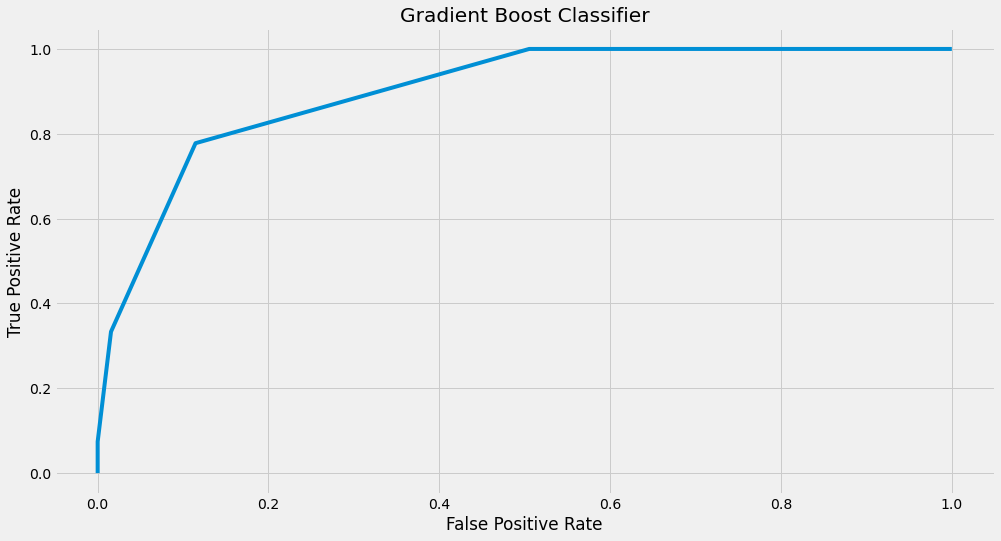

In [103]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost Classifier')
plt.show()

In [104]:
import pickle
filename='HR_Attrition.pkl'
pickle.dump(gd,open(filename,'wb'))

As in gradient boosting we are getting 82% accuracy ,we are going to consider it as best fit model

     Actual  Predict
630     0.0      0.0
19      0.0      0.0
21      0.0      0.0
490     0.0      0.0
965     0.0      0.0
..      ...      ...
130     0.0      0.0
983     0.0      0.0
18      0.0      0.0
996     0.0      0.0
486     0.0      0.0

[246 rows x 2 columns]


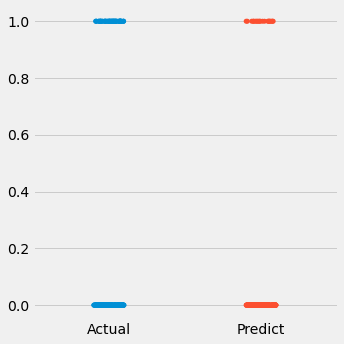

In [105]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=gd.predict(x_test)

print(res)
sns.catplot(data=res)

#                                                        Thank you